In [1]:
!pip install ultralytics
from ultralytics import YOLO
import ultralytics
ultralytics.checks()


Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6361.9/8062.4 GB disk)


In [5]:
import textwrap

yaml_content = textwrap.dedent("""\
    train: /kaggle/input/surungembocekdataset/SurungenBocekDataset/SurungenBocekDataset/train/images
    val: /kaggle/input/surungembocekdataset/SurungenBocekDataset/SurungenBocekDataset/valid/images
    test: /kaggle/input/surungembocekdataset/SurungenBocekDataset/SurungenBocekDataset/test/images

    nc: 45
    names: [
      'Akdeniz Munzevi Orumcegi',
      'Anadolu Sari Akrebi',
      'Kara Akrep',
      'Katil Ari',
      'Yaprak Biti',
      'Ordu kurtlari',
      'Bati misir kok kurdu',
      'Kahverengi Kokarca Bocegi',
      'Cabbage Loopers',
      'Lahana Tittillari',
      'Charybdis Natator',
      'Narenciye Kanseri',
      'Colorado Patates Bocekleri',
      'Misir Kurdu',
      'Misir Yuvarlak Kurdu',
      'Sonbahar Ordu Kurdu',
      'Sirke Sinegi',
      'Heterometrus indus',
      'Heterometrus-swammerdami',
      'Hottentotta Jayakari',
      'Hottentotta tamulus',
      'Leiurus quinquestriatus',
      'İmparator Akrep',
      'Patates Bocegi',
      'Kum Yengeci',
      'Portunus Sanguinolentus',
      'Kirmizi Örümcek',
      'Trips',
      'Tomato Hornworms',
      'Zosimus Aeneus',
      'Mavi Yengec',
      'Kemanci Yengec',
      'Hayalet Boynuzlu Yengec',
      'legume blister beetle',
      'Sally Lightfoot Yengeci',
      'Camur Yengeci',
      'Pirinc Gal Sinegi',
      'Pirinc yaprak Kiviricisi',
      'rice leafhopper',
      'rice water weevil',
      'Akrepler',
      'Florida tas yengeci',
      'wheat phloeothrips',
      'Beyaz Sirtli Bitki Zararlisi',
      'yellow rice borer'
    ]
""")

with open("/kaggle/working/data.yaml", "w") as f:
    f.write(yaml_content)


In [6]:
!cat /kaggle/working/data.yaml

train: /kaggle/input/surungembocekdataset/SurungenBocekDataset/SurungenBocekDataset/train/images
val: /kaggle/input/surungembocekdataset/SurungenBocekDataset/SurungenBocekDataset/valid/images
test: /kaggle/input/surungembocekdataset/SurungenBocekDataset/SurungenBocekDataset/test/images

nc: 45
names: [
  'Akdeniz Munzevi Orumcegi',
  'Anadolu Sari Akrebi',
  'Kara Akrep',
  'Katil Ari',
  'Yaprak Biti',
  'Ordu kurtlari',
  'Bati misir kok kurdu',
  'Kahverengi Kokarca Bocegi',
  'Cabbage Loopers',
  'Lahana Tittillari',
  'Charybdis Natator',
  'Narenciye Kanseri',
  'Colorado Patates Bocekleri',
  'Misir Kurdu',
  'Misir Yuvarlak Kurdu',
  'Sonbahar Ordu Kurdu',
  'Sirke Sinegi',
  'Heterometrus indus',
  'Heterometrus-swammerdami',
  'Hottentotta Jayakari',
  'Hottentotta tamulus',
  'Leiurus quinquestriatus',
  'İmparator Akrep',
  'Patates Bocegi',
  'Kum Yengeci',
  'Portunus Sanguinolentus',
  'Kirmizi Örümcek',
  'Trips',
  'Tomato Hornworms',
  'Zosimus Aeneus',
  'Mavi Yengec

In [ ]:
!yolo detect train data=/kaggle/working/data.yaml model=yolo11n.pt epochs=100 imgsz=640 workers=8 batch=8 device=0 name=SurungenBocek_detection

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 17.5MB/s]
Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=SurungenBocek_detection, nbs=64, nms=False, opset=None, optimize=False, optimi


0: 640x640 1 Kara Akrep, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


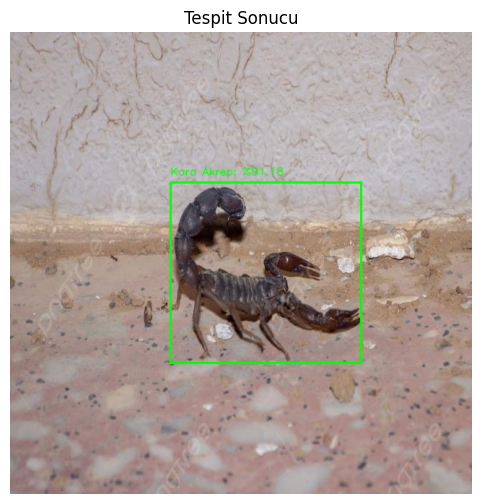

In [19]:
import cv2
import imutils
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Yazı tipi
font = cv2.FONT_HERSHEY_SIMPLEX

# Görsel ve model yolları
# AkdenizMunzeviOrumcegi65_jpg.rf.8f341739544a7bb9e2af8c9a17f99b2e.jpg
# AnadoluSariAkrebi106_jpg.rf.3e093255772d491578d97cd0ba0dded8.jpg
# ZehirliKaraAkrep255_jpg.rf.4f102032aeac29bf4d877b7e065679a3.jpg
img_path = "/kaggle/input/surungembocekdataset/SurungenBocekDataset/SurungenBocekDataset/test/images/ZehirliKaraAkrep255_jpg.rf.4f102032aeac29bf4d877b7e065679a3.jpg"
model_path = "/kaggle/working/runs/detect/SurungenBocek_detection/weights/best.pt"

# Görseli oku ve yeniden boyutlandır
img = cv2.imread(img_path)
img = imutils.resize(img, width=640)

# Modeli yükle ve tahmin yap
model = YOLO(model_path)
results = model(img)[0]

# Eşik değeri
threshold = 0.5

# Tespitleri işle
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    x1, y1, x2, y2, class_id = int(x1), int(y1), int(x2), int(y2), int(class_id)

    if score > threshold:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        class_name = results.names[class_id]
        score = score * 100
        text = f"{class_name}: %{score:.2f}"
        cv2.putText(img, text, (x1, y1 - 10), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

# Görseli BGR'dan RGB'ye çevir ve matplotlib ile göster
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Tespit Sonucu")
plt.axis("off")
plt.show()


In [20]:
!zip -r SurungenBocek_detection.zip /kaggle/working/runs/detect/SurungenBocek_detection


  adding: kaggle/working/runs/detect/SurungenBocek_detection/ (stored 0%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/args.yaml (deflated 52%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/val_batch1_labels.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/PR_curve.png (deflated 21%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/results.csv (deflated 62%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/weights/best.pt (deflated 10%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/weights/last.pt (deflated 10%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/confusion_matrix.png (deflated 16%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/train_batch0.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/SurungenBocek_detection/val_batch2_pred.jpg (deflated 9%)
  adding: kaggle